In [24]:
import numpy as np
import pandas as pd

In [25]:
data = pd.read_csv(r"Iris.csv")
#删除不需要的id与class列,inplace就地修改
data.drop(["id","class"],axis=1,inplace=True)
#删除重复信息
data.drop_duplicates(inplace=True)

In [32]:
#KNN回归预测
class KNN:
    '''
    使用python实现k近邻算法。(回归预测)
    该算法用于回归预测，根据前三个特征属性，寻找最近的k个邻居，
    然后再根据K个邻居的第四个特征属性去预测当前样本的第4个特征值
    '''
    def __init__(self,k):
        '''
        初始化方法
        
        Parameters:
        ---
        k:int 
            邻居的个数。
        
        '''
        self.k = k
        
    def fit(self,X,y):
        '''
        训练方法
        
        Parameters:
        ---
        X:类数组类型(特征矩阵)，形状为[样本数量，特征数量]
            待训练的样本特征(属性)
            邻居的个数。
        y:类数组类型(目标标签)。形状为[样本数量]
            每个样本的目标值(标签)
        '''
        #将X,y转换为np.array数组的形式，方便统一进行操作
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
        
    def predict(self,X):
        '''
        根据参数传递的x，对样本进行预测
        
        Parameters:
        ---
        X:类数组类型(特征矩阵)，形状为[样本数量，特征数量]
            待测试的样本特征(属性)
            邻居的个数。
            
        Returns:
        ----
        result:数组类型
            预测结果值
        '''
        
        #转换成数组类型
        X = np.asarray(X)
        #保存预测的结果值
        result = []
        for x in X:
            #计算与训练集中每个X的距离
            dis = np.sqrt(np.sum((x-self.X)**2,axis=1))
            #返回数组排序后，每个元素在原数组中的索引
            index = dis.argsort()
            #取前k个距离最近的索引(原数组中的索引)
            index = index[:self.k]
            #取均值,然后加入到返回的结果列表中
            result.append(np.mean(self.y[index]))
        return np.array(result)

    def predict2(self,X):
        '''
        根据参数传递的x，对样本进行预测(考虑权重)
        权重计算方式：使用每个结点(邻居)距离的倒数/所有邻居距离倒数之和
        
        Parameters:
        ---
        X:类数组类型(特征矩阵)，形状为[样本数量，特征数量]
            待测试的样本特征(属性)
            邻居的个数。
            
        Returns:
        ----
        result:数组类型
            预测结果值
        '''
        
        #转换成数组类型
        X = np.asarray(X)
        #保存预测的结果值
        result = []
        for x in X:
            #计算与训练集中每个X的距离
            dis = np.sqrt(np.sum((x-self.X)**2,axis=1))
            #返回数组排序后，每个元素在原数组中的索引
            index = dis.argsort()
            #取前k个距离最近的索引(原数组中的索引)
            index = index[:self.k]
            #与权重相乘,然后加入到返回的结果列表中
            #求所有结点距离的倒数之和,最后加上很小的值，避免除数为0的情况
            s = np.sum(1/(dis[index]+0.0001))
            #每个结点的权重计算
            weight = (1/(dis[index]+0.0001))/s
            #使用邻居节点的标签值乘以对应的权重，相加求和，得到最后的结果
            result.append(np.sum(self.y[index]*weight))
        return np.array(result)

In [38]:
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:120,:-1]
train_y = t.iloc[:120,-1]
test_X = t.iloc[120:,:-1]
test_y = t.iloc[120:,-1]

knn = KNN(k=3)
knn.fit(train_X,train_y)
result = knn.predict(test_X)
np.mean((result-test_y)**2)

0.04185185185185184

In [39]:
#可视化展示
import matplotlib as mpl
import matplotlib.pyplot as plt
#默认情况下不支持中文显示，需要进行设置
#设置黑体，支持中文显示
mpl.rcParams["font.family"] = "SimHei"
#在设置中文字体时，能够正常的显示符号
mpl.rcParams["axes.unicode_minus"] = False

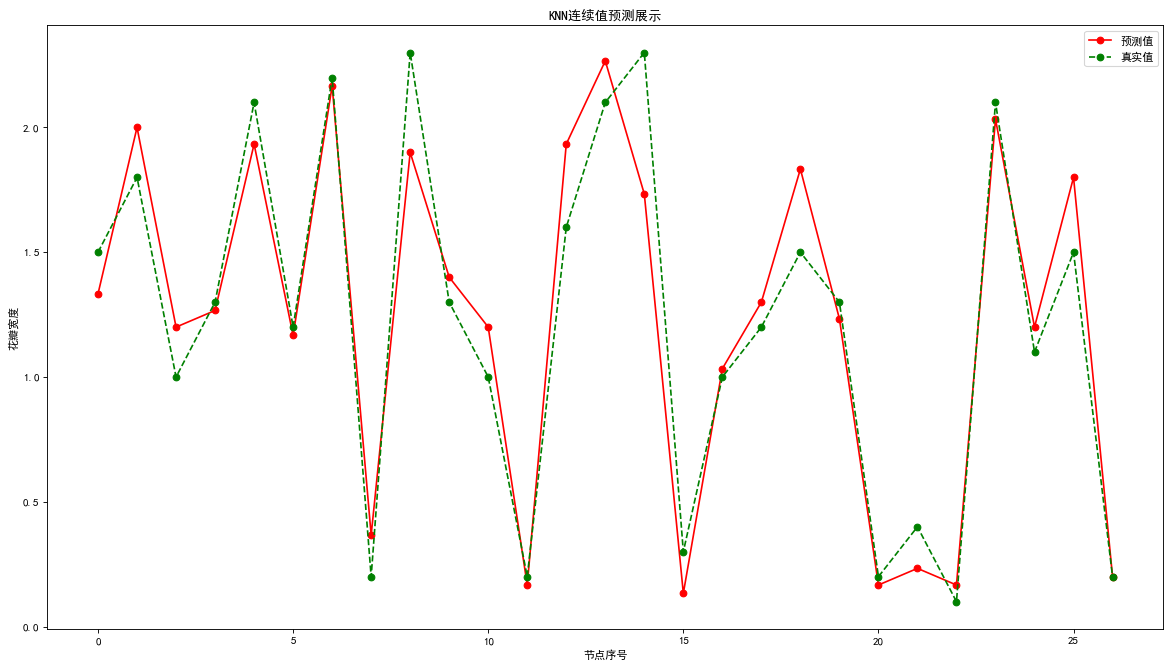

In [40]:
plt.figure(figsize=(18,10),dpi=80)
#绘制预测值
plt.plot(result,"ro-",label="预测值")
#绘制真实值
plt.plot(test_y.values,"go--",label="真实值")
plt.title("KNN连续值预测展示")
plt.xlabel("节点序号")
plt.ylabel("花瓣宽度")
plt.legend()
plt.show()

In [41]:
#使用权重
knn2 = KNN(k=3)
knn2.fit(train_X,train_y)
result2 = knn.predict2(test_X)
np.mean((result2-test_y)**2)

0.04585326018974709

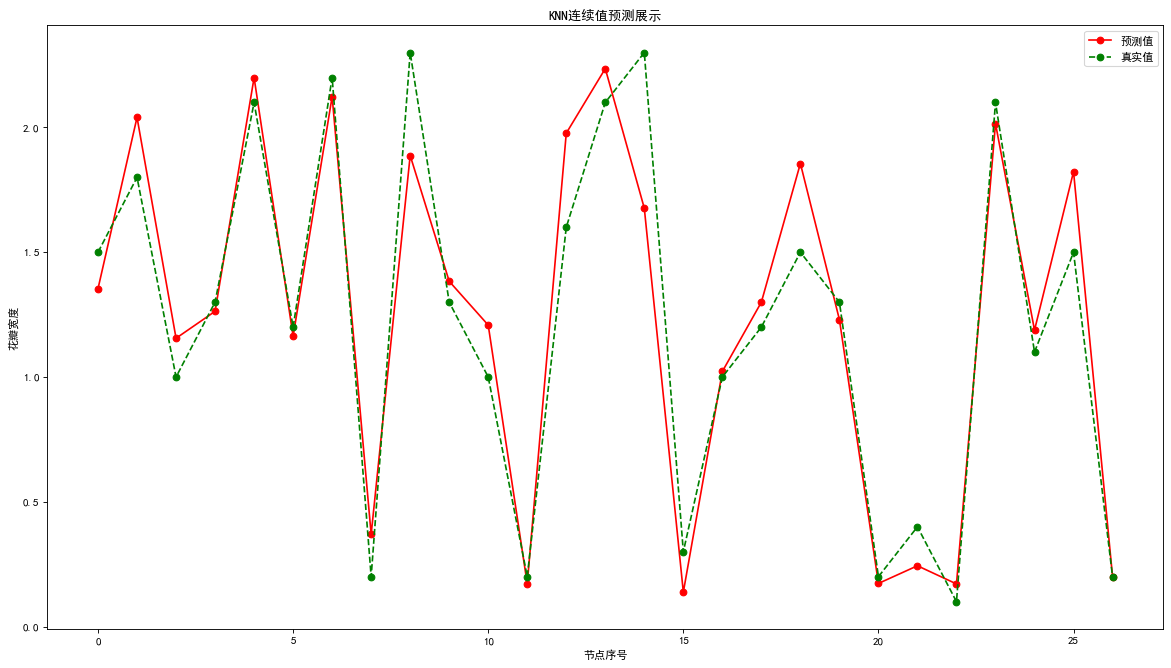

In [42]:
plt.figure(figsize=(18,10),dpi=80)
#绘制预测值
plt.plot(result2,"ro-",label="预测值")
#绘制真实值
plt.plot(test_y.values,"go--",label="真实值")
plt.title("KNN连续值预测展示")
plt.xlabel("节点序号")
plt.ylabel("花瓣宽度")
plt.legend()
plt.show()